# Overview

In [122]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: c:\Users\ASUS\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: c:\Users\ASUS\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: c:\Users\ASUS\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: c:\Users\ASUS\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: c:\Users\ASUS\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: c:\Users\ASUS\.pyenv\pyenv-win\versions\3.12.7\python.exe -m pip install --upgrade pip


In [123]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
import os

In [124]:
print(os.getcwd())

d:\University\msc\3_felev\hamlab\beadas\ddos-detector\M3


In [125]:
warnings.filterwarnings("ignore")

In [126]:
data = pd.read_parquet("data/preprocessed_data_A.parquet")

In [127]:
data["Victim IP Number"] = data["Victim IP"].str.extract(r"IP_(\d+)").astype(int)
data["Type_Original"] = data["Type"]
data = pd.get_dummies(data, columns=['Type'])
data = data.rename(columns={"Type_Original": "Type"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586636 entries, 0 to 586637
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Attack ID                 586636 non-null  int64         
 1   Detect count              586636 non-null  int64         
 2   Victim IP                 586636 non-null  object        
 3   Port number               586636 non-null  int64         
 4   Attack code               586636 non-null  object        
 5   Packet speed              586636 non-null  float32       
 6   Data speed                586636 non-null  float32       
 7   Avg packet len            586636 non-null  float32       
 8   Source IP count           586636 non-null  float32       
 9   Time                      586636 non-null  object        
 10  Avg source IP count       586636 non-null  float32       
 11  Start time                586636 non-null  datetime64[ns]
 12  End tim

In [128]:
df = data.rename(columns={
    "Attack code": "attack_code",
    "Victim IP Number": "victim_ip",
    "Port number": "port_number",
    "Packet speed": "packet_speed",
    "Data speed": "data_speed",
    "Avg packet len": "packet_len",
    "Source IP count": "source_ip",
    "Avg source IP count": "avg_source_ip",
    "Start_time_hour_sin": "start_hour",
    "Start_time_weekday_sin": "start_weekday",
    "Start_time_dayofyear_sin": "start_dayofyear",
    "End_time_hour_sin": "end_hour",
    "End_time_weekday_sin": "end_weekday",
    "End_time_dayofyear_sin": "end_dayofyear",
    "Type_DDoS attack": "type_ddos",
    "Type_Normal traffic": "type_normal",
    "Type_Suspicious traffic": "type_sus"
})[
    ["attack_code","victim_ip", "port_number", "packet_speed", "data_speed", "packet_len", "source_ip", "avg_source_ip",
     "start_hour", "start_weekday", "start_dayofyear", "end_hour", "end_weekday", "end_dayofyear",
     "type_ddos", "type_normal", "type_sus"]
]



In [129]:
df.columns

Index(['attack_code', 'victim_ip', 'port_number', 'packet_speed', 'data_speed',
       'packet_len', 'source_ip', 'avg_source_ip', 'start_hour',
       'start_weekday', 'start_dayofyear', 'end_hour', 'end_weekday',
       'end_dayofyear', 'type_ddos', 'type_normal', 'type_sus'],
      dtype='object')

In [130]:
df["type"] = df[["type_ddos", "type_sus", "type_normal"]].idxmax(axis=1)
df["type"] = df["type"].map({"type_ddos": "ddos", "type_sus": "sus", "type_normal": "normal"})
# df = df.drop(columns=["type_ddos", "type_sus", "type_normal"])

df.head()

,attack_code,victim_ip,port_number,packet_speed,data_speed,packet_len,source_ip,avg_source_ip,start_hour,start_weekday,start_dayofyear,end_hour,end_weekday,end_dayofyear,type_ddos,type_normal,type_sus,type
0,High volume traffic,1,4500,55600.0,73.0,1383.0,6.0,6.0,-1.0,0.0,-0.601624,-1.0,0.0,-0.601624,False,True,False,normal
1,High volume traffic,2,4500,63500.0,90.0,1506.0,1.0,1.0,-1.0,0.0,-0.601624,-1.0,0.0,-0.601624,False,True,False,normal
2,High volume traffic,3,1200,59700.0,79.0,1399.0,1.0,1.0,-1.0,0.0,-0.601624,-1.0,0.0,-0.601624,False,True,False,normal
3,High volume traffic,3,1200,65700.0,86.0,1399.0,1.0,1.0,-1.0,0.0,-0.601624,-1.0,0.0,-0.601624,False,True,False,normal
4,High volume traffic,2,4500,59500.0,85.0,1486.0,1.0,1.0,-1.0,0.0,-0.601624,-1.0,0.0,-0.601624,False,True,False,normal


# Domain knowledge

Get unique values

In [131]:
unique_attack_codes = df['attack_code'].unique()
unique_attack_codes

array(['High volume traffic', 'Suspicious traffic', 'DNS', 'Generic UDP',
       'CLDAP', 'DNS, High volume traffic', 'SNMP, High volume traffic',
       'DNS, SNMP, High volume traffic',
       'DNS, SNMP, IPv4 fragmentation, High volume traffic',
       'DNS, SNMP, IPv4 fragmentation', 'DNS, SNMP', 'SNMP', 'CoAP',
       'Generic UDP, RPC', 'Sentinel', 'SSDP', 'NTP, SSDP',
       'NTP, SSDP, High volume traffic', 'SSDP, High volume traffic',
       'NTP', 'CoAP, High volume traffic', 'CLDAP, High volume traffic',
       'IPv4 fragmentation', 'NTP, RDP', 'DNS, NTP', 'DNS, NTP, RDP',
       'NTP, High volume traffic', 'TCP Anomaly', 'SYN Attack',
       'TCP Anomaly, ACK Attack', 'Suspicious traffic, NTP',
       'Suspicious traffic, CLDAP',
       'IPv4 fragmentation, High volume traffic',
       'Suspicious traffic, DNS', 'DNS, CLDAP, High volume traffic',
       'DNS, CLDAP', 'Suspicious traffic, DNS, IPv4 fragmentation',
       'Suspicious traffic, DNS, SYN Attack', 'Suspicious tra

## Protocols

In [132]:
def add_protocol_features(df):
    df['is_dns'] = df['port_number'].isin([53, 5353]).astype(int)  # DNS
    df['is_ntp'] = df['port_number'].isin([123]).astype(int)        # NTP
    df['is_coap'] = df['port_number'].isin([5683, 5684]).astype(int) # CoAP
    df['is_ssdp'] = (df['port_number'] == 1900).astype(int)  # SSDP
    return df

In [133]:
add_protocol_features(df)

,attack_code,victim_ip,port_number,packet_speed,data_speed,packet_len,source_ip,avg_source_ip,start_hour,start_weekday,...,end_weekday,end_dayofyear,type_ddos,type_normal,type_sus,type,is_dns,is_ntp,is_coap,is_ssdp
0,High volume traffic,1,4500,55600.0,73.0,1383.0,6.0,6.0,-1.000000e+00,0.000000,...,0.000000,-0.601624,False,True,False,normal,0,0,0,0
1,High volume traffic,2,4500,63500.0,90.0,1506.0,1.0,1.0,-1.000000e+00,0.000000,...,0.000000,-0.601624,False,True,False,normal,0,0,0,0
2,High volume traffic,3,1200,59700.0,79.0,1399.0,1.0,1.0,-1.000000e+00,0.000000,...,0.000000,-0.601624,False,True,False,normal,0,0,0,0
3,High volume traffic,3,1200,65700.0,86.0,1399.0,1.0,1.0,-1.000000e+00,0.000000,...,0.000000,-0.601624,False,True,False,normal,0,0,0,0
4,High volume traffic,2,4500,59500.0,85.0,1486.0,1.0,1.0,-1.000000e+00,0.000000,...,0.000000,-0.601624,False,True,False,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586631,High volume traffic,16816,0,56800.0,68.0,1293.0,24.0,25.0,1.224647e-16,0.433884,...,0.433884,0.903356,False,True,False,normal,0,0,0,0
586634,High volume traffic,23,48529,73100.0,85.0,1185.0,2.0,3.0,1.224647e-16,0.433884,...,0.433884,0.903356,False,True,False,normal,0,0,0,0
586635,High volume traffic,17827,0,52200.0,74.0,1506.0,1.0,1.0,1.224647e-16,0.433884,...,0.433884,0.903356,False,True,False,normal,0,0,0,0
586636,High volume traffic,23,61167,60000.0,67.0,1257.0,5.0,3.0,1.224647e-16,0.433884,...,0.433884,0.903356,False,True,False,normal,0,0,0,0


In [134]:
def count_protocols(df):
    protocols = ['is_dns', 'is_ntp', 'is_coap', 'is_ssdp']
    protocol_counts = {}
    for proto in protocols:
        protocol_counts[proto] = df[proto].sum()
    return protocol_counts

protocol_counts = count_protocols(df)
protocol_counts


{'is_dns': np.int64(16015),
 'is_ntp': np.int64(593),
 'is_coap': np.int64(1),
 'is_ssdp': np.int64(30)}

In [135]:
df.head()

,attack_code,victim_ip,port_number,packet_speed,data_speed,packet_len,source_ip,avg_source_ip,start_hour,start_weekday,...,end_weekday,end_dayofyear,type_ddos,type_normal,type_sus,type,is_dns,is_ntp,is_coap,is_ssdp
0,High volume traffic,1,4500,55600.0,73.0,1383.0,6.0,6.0,-1.0,0.0,...,0.0,-0.601624,False,True,False,normal,0,0,0,0
1,High volume traffic,2,4500,63500.0,90.0,1506.0,1.0,1.0,-1.0,0.0,...,0.0,-0.601624,False,True,False,normal,0,0,0,0
2,High volume traffic,3,1200,59700.0,79.0,1399.0,1.0,1.0,-1.0,0.0,...,0.0,-0.601624,False,True,False,normal,0,0,0,0
3,High volume traffic,3,1200,65700.0,86.0,1399.0,1.0,1.0,-1.0,0.0,...,0.0,-0.601624,False,True,False,normal,0,0,0,0
4,High volume traffic,2,4500,59500.0,85.0,1486.0,1.0,1.0,-1.0,0.0,...,0.0,-0.601624,False,True,False,normal,0,0,0,0


Ports with largest attack rates

In [136]:
protocol_attack_rates = df.groupby('port_number')['type_ddos'].mean()
protocol_attack_rates
top_attack_protocols = protocol_attack_rates.nlargest(10)
top_attack_protocols

port_number
1       1.0
12      1.0
68      1.0
99      1.0
120     1.0
123     1.0
231     1.0
514     1.0
1116    1.0
1338    1.0
Name: type_ddos, dtype: float64

## TCP/UDP

In [137]:
df.columns

Index(['attack_code', 'victim_ip', 'port_number', 'packet_speed', 'data_speed',
       'packet_len', 'source_ip', 'avg_source_ip', 'start_hour',
       'start_weekday', 'start_dayofyear', 'end_hour', 'end_weekday',
       'end_dayofyear', 'type_ddos', 'type_normal', 'type_sus', 'type',
       'is_dns', 'is_ntp', 'is_coap', 'is_ssdp'],
      dtype='object')

Multi-protocol attack patterns

In [138]:
df['multi_protocol_attack'] = (
    (df['is_dns'] + df['is_ntp'] + df['is_ssdp']) > 1
).astype(int)


In [139]:
print(df['multi_protocol_attack'])

0         0
1         0
2         0
3         0
4         0
         ..
586631    0
586634    0
586635    0
586636    0
586637    0
Name: multi_protocol_attack, Length: 586636, dtype: int64


In [140]:
unique_multi_protocol_attack = df['multi_protocol_attack'].unique()
print(unique_multi_protocol_attack)

[0]


Only unique value is 0.

Upon looking at the data again, it's no surprise that there is no multoprotocol attack.

UDP-based amplification risk

UDP exploit

In [141]:
df['udp_amp_risk'] = (
    df['is_dns'] | df['is_ntp'] | df['is_ssdp']
) * (df['data_speed'] / (df['packet_speed'] + 1e-6))

In [142]:
df['udp_amp_risk']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
586631    0.0
586634    0.0
586635    0.0
586636    0.0
586637    0.0
Name: udp_amp_risk, Length: 586636, dtype: float64

In [143]:
unique_udp_amp_risk = df['udp_amp_risk'].unique()
print(unique_udp_amp_risk)

[0.00000000e+00 3.37349396e-04 7.92079227e-05 ... 1.17079355e-03
 1.03356212e-03 7.21500692e-05]


Extracting information wether the attacks may target critical services such as webservers.

Examined ports:

Target web
- 80 HTTP
- 443 HTTPS
- 8080 alternative HTTP services 

Target database
- 3306 MySQL
- 5432 PostgresSQL
- 27017 MongoDB

In [144]:
df['targets_web'] = df['port_number'].isin([80, 443, 8080]).astype(int)
df['targets_db'] = df['port_number'].isin([3306, 5432, 27017]).astype(int)

In [145]:
print(df['targets_web'])

0         0
1         0
2         0
3         0
4         0
         ..
586631    0
586634    0
586635    0
586636    0
586637    0
Name: targets_web, Length: 586636, dtype: int64


In [146]:
print((df['targets_web'] == 1).sum().sum())

62941


In [147]:
print((df['targets_db'] == 1).sum().sum())

0


No database target, but sinificant amount web targets.

Ephemeral port floods
A network attack where a large number of requests are sent to temporary ports. These ports have the number of >49152.

In [148]:
df['ephemeral_flood'] = (
    (df['port_number'] > 49152) &
    (df['packet_speed'] > df['packet_speed'].quantile(0.99))
).astype(int)

In [149]:
ephemeral_flood = df['ephemeral_flood'].unique()
print(ephemeral_flood)

[0 1]


In [150]:
print((df['ephemeral_flood'] == 1).sum().sum())

97


Small number of ephemeral floods.

Duration of attack

In [151]:
df['attack_duration'] = (
    (df['end_dayofyear'] - df['start_dayofyear']) * 86400 +
    (df['end_hour'] - df['start_hour']) * 3600
).abs()

In [152]:
unique_attack_durations = df['attack_duration'].unique()
print(unique_attack_durations)

[   0.          868.25143763  868.25143763  745.58441227  572.10704135
  122.66702536  931.74856237  931.74856237  868.25143763  745.58441227
  572.10704135  359.64152102  359.64152102  572.10704135 2545.58441227
  572.10704135 1317.69145362  113.11286597 1800.          359.64152102
  482.30854638   57.08359908  305.44984308  745.58441227  328.76331098
  572.10704135  695.92492317  874.15733753 2545.58441227  122.66702536
 2104.18604971 2412.37661091 6235.38290725 2352.06017179 2218.71057737
 2088.26029399 1967.46130599 1910.98203793 1831.64183688 1811.12524231
 1726.51502353 1638.13809701 1403.50369657 1379.15457201 1230.53088775
 1154.92431508 1129.57988053 1078.72267385  874.15733753  746.6119147
  482.30854638  645.51742947  620.43717884  595.44917648 1677.33297464
 1800.         1317.69145362 2731.74856237  521.11255413  496.56728354
 1340.40240418  447.87083825  423.73409336  352.25545642  328.76331098
 1173.70128071]


In [153]:
#print("Min:", df['attack_duration'].min())
print("Max:", df['attack_duration'].max())
print("Avg:", df['attack_duration'].mean())

Max: 6235.3829072479575
Avg: 343.49610359488923


Hourly attack probability

In [154]:
hourly_risk = df.groupby('start_hour')['type_ddos'].mean()
df['hourly_risk'] = df['start_hour'].map(hourly_risk)

In [155]:
print(hourly_risk)

start_hour
-1.000000e+00    0.366628
-9.659258e-01    0.319764
-9.659258e-01    0.072055
-8.660254e-01    0.050741
-8.660254e-01    0.098071
-7.071068e-01    0.017589
-7.071068e-01    0.151800
-5.000000e-01    0.101401
-5.000000e-01    0.027884
-2.588190e-01    0.036141
-2.588190e-01    0.022198
 0.000000e+00    0.103243
 1.224647e-16    0.132235
 2.588190e-01    0.028386
 2.588190e-01    0.042847
 5.000000e-01    0.104265
 7.071068e-01    0.227352
 8.660254e-01    0.622151
 8.660254e-01    0.082044
 9.659258e-01    0.102342
 1.000000e+00    0.296547
Name: type_ddos, dtype: float64


In [156]:
print(df['start_weekday'].unique())

[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]


Packet size deviation

In [157]:
global_avg_len = df['packet_len'].mean()
df['size_anomaly'] = (df['packet_len'] - global_avg_len).abs() / global_avg_len

In [158]:
print(df['size_anomaly'].unique())

[0.41873738 0.5449158  0.43515083 ... 0.6194132  0.594793   0.47169214]


Spped ratio anomaly

In [159]:
df['speed_ratio'] = df['packet_speed'] / (df['data_speed'] + 1e-6)

In [160]:
print(df['speed_ratio'].unique())

[ 761.64386  705.55554  755.6962  ...  777.7004  1410.1449  2589.3618 ]


Burst detection calculation with a rolling window of 5 observations for each victim IP adderess.

In [161]:
df['burst_score'] = df.groupby('victim_ip')['packet_speed'].transform(
    lambda x: (x.rolling(5).std() / x.rolling(5).mean()).fillna(0)
)

In [162]:
print(df['burst_score'].unique())

[0.         0.09363767 0.19053565 ... 0.13287881 0.14189142 0.03669251]


In [163]:
# fixing NaN values in burst_score (debug)
nan_values_count = df['burst_score'].isnull().sum()
print("Number of NaN values in 'burst_score':", nan_values_count)

Number of NaN values in 'burst_score': 0


Historical victim targeting

In [164]:
victim_risk = df.groupby('victim_ip')['type_ddos'].mean()
df['victim_risk'] = df['victim_ip'].map(victim_risk)

In [165]:
ip_attack_counts = data['Victim IP'].value_counts()
print(ip_attack_counts)

Victim IP
IP_0151     134155
IP_0040      21552
IP_0202      21322
IP_0006      19880
IP_0010      18254
             ...  
IP_18192         1
IP_18191         1
IP_18189         1
IP_18188         1
IP_18187         1
Name: count, Length: 18200, dtype: int64


Top IP attacks

In [166]:
top_ip_attacks = ip_attack_counts.sort_values(ascending=False).head(10)
print(top_ip_attacks)


Victim IP
IP_0151     134155
IP_0040      21552
IP_0202      21322
IP_0006      19880
IP_0010      18254
IP_0017      16867
IP_0074      16759
IP_0024      15194
IP_0965      13592
IP_15194     12608
Name: count, dtype: int64


Port concentration

In [167]:
df['ports_per_victim'] = df.groupby('victim_ip')['port_number'].transform('nunique')

In [168]:
print(df['ports_per_victim'])

0           11
1            5
2          600
3          600
4            5
          ... 
586631     713
586634    2167
586635       3
586636    2167
586637       3
Name: ports_per_victim, Length: 586636, dtype: int64


In [169]:
top_ports_per_victim = df['ports_per_victim'].value_counts().head(10)
print(top_ports_per_victim)

ports_per_victim
4199    134155
1        28231
4        25771
3        25614
6708     21552
30       21393
2        19957
480      19880
9314     18254
2877     16867
Name: count, dtype: int64


In [170]:
# Protocol + temporal 
# df['dns_night_attack'] = (df['is_dns'] & (df['start_hour'].between(0, 4)).astype(int)).astype(int)

# Packet size + protocol
# df['small_udp_dns'] = (df['is_dns'] & df['udp_small_packets']).astype(int)

In [171]:
from sklearn.ensemble import RandomForestClassifier

Calculating feature importance based on the results of a RandomForestClassifier

In [177]:
final_features = [
    #protocol
    'is_dns', 'is_ntp', 'multi_protocol_attack', 'udp_amp_risk',

    #port and target
    'targets_web', 'ephemeral_flood',

    #time
    'attack_duration',

    # packet
    'size_anomaly', 'burst_score',

    # victim
    'victim_risk'
]

X = df[final_features]
y = df['type_ddos']
model = RandomForestClassifier().fit(X, y)

In [180]:
feature_importances = model.feature_importances_
for i, feature_name in enumerate(final_features):
  print(f"{feature_name}: {feature_importances[i]}")


is_dns: 0.018272559866808726
is_ntp: 0.0005722807141386133
multi_protocol_attack: 0.0
udp_amp_risk: 0.040749282136956465
targets_web: 0.012156672584530357
ephemeral_flood: 1.084736043994393e-05
attack_duration: 0.1114198884252385
size_anomaly: 0.09761242750732974
burst_score: 0.09028622428444721
victim_risk: 0.6289198171201105


In [181]:
import matplotlib.pyplot as plt

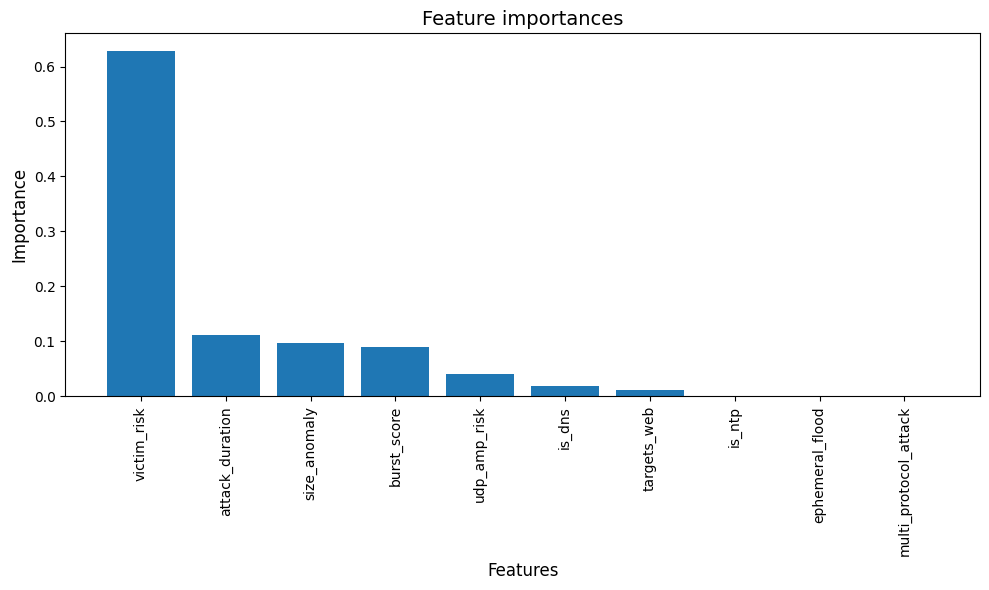

In [182]:
feature_names = final_features
importances = feature_importances

sorted_indices = np.argsort(importances)[::-1]
sorted_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_names, rotation=90) # rotation of text

plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.title("Feature importances", fontsize=14)
plt.tight_layout()

plt.show()

In [184]:
#df = df.drop(columns=['multi_protocol_attack', 'ephemeral_flood', 'is_weekend', 'is_ntp'])


## Feature transformation

In [185]:
df.head()

,attack_code,victim_ip,port_number,packet_speed,data_speed,packet_len,source_ip,avg_source_ip,start_hour,start_weekday,...,targets_web,targets_db,ephemeral_flood,attack_duration,hourly_risk,size_anomaly,speed_ratio,burst_score,victim_risk,ports_per_victim
0,High volume traffic,1,4500,55600.0,73.0,1383.0,6.0,6.0,-1.0,0.0,...,0,0,0,0.0,0.366628,0.418737,761.643860,0.0,0.02909,11
1,High volume traffic,2,4500,63500.0,90.0,1506.0,1.0,1.0,-1.0,0.0,...,0,0,0,0.0,0.366628,0.544916,705.555542,0.0,0.00000,5
2,High volume traffic,3,1200,59700.0,79.0,1399.0,1.0,1.0,-1.0,0.0,...,0,0,0,0.0,0.366628,0.435151,755.696228,0.0,0.00015,600
3,High volume traffic,3,1200,65700.0,86.0,1399.0,1.0,1.0,-1.0,0.0,...,0,0,0,0.0,0.366628,0.435151,763.953491,0.0,0.00015,600
4,High volume traffic,2,4500,59500.0,85.0,1486.0,1.0,1.0,-1.0,0.0,...,0,0,0,0.0,0.366628,0.524399,700.000000,0.0,0.00000,5


In [186]:
df.columns

Index(['attack_code', 'victim_ip', 'port_number', 'packet_speed', 'data_speed',
       'packet_len', 'source_ip', 'avg_source_ip', 'start_hour',
       'start_weekday', 'start_dayofyear', 'end_hour', 'end_weekday',
       'end_dayofyear', 'type_ddos', 'type_normal', 'type_sus', 'type',
       'is_dns', 'is_ntp', 'is_coap', 'is_ssdp', 'multi_protocol_attack',
       'udp_amp_risk', 'targets_web', 'targets_db', 'ephemeral_flood',
       'attack_duration', 'hourly_risk', 'size_anomaly', 'speed_ratio',
       'burst_score', 'victim_risk', 'ports_per_victim'],
      dtype='object')

Applying logarithmic tranformation to specific features.

In [187]:
log_features = ['packet_speed', 'data_speed', 'source_ip', 'avg_source_ip']
for feature in log_features:
    df[f'log_{feature}'] = np.log1p(df[feature])

In [188]:
print(df[log_features])

        packet_speed  data_speed  source_ip  avg_source_ip
0            55600.0        73.0        6.0            6.0
1            63500.0        90.0        1.0            1.0
2            59700.0        79.0        1.0            1.0
3            65700.0        86.0        1.0            1.0
4            59500.0        85.0        1.0            1.0
...              ...         ...        ...            ...
586631       56800.0        68.0       24.0           25.0
586634       73100.0        85.0        2.0            3.0
586635       52200.0        74.0        1.0            1.0
586636       60000.0        67.0        5.0            3.0
586637       51300.0        64.0        1.0            1.0

[586636 rows x 4 columns]


In [189]:
df.head()

,attack_code,victim_ip,port_number,packet_speed,data_speed,packet_len,source_ip,avg_source_ip,start_hour,start_weekday,...,hourly_risk,size_anomaly,speed_ratio,burst_score,victim_risk,ports_per_victim,log_packet_speed,log_data_speed,log_source_ip,log_avg_source_ip
0,High volume traffic,1,4500,55600.0,73.0,1383.0,6.0,6.0,-1.0,0.0,...,0.366628,0.418737,761.643860,0.0,0.02909,11,10.925957,4.304065,1.945910,1.945910
1,High volume traffic,2,4500,63500.0,90.0,1506.0,1.0,1.0,-1.0,0.0,...,0.366628,0.544916,705.555542,0.0,0.00000,5,11.058811,4.510859,0.693147,0.693147
2,High volume traffic,3,1200,59700.0,79.0,1399.0,1.0,1.0,-1.0,0.0,...,0.366628,0.435151,755.696228,0.0,0.00015,600,10.997104,4.382027,0.693147,0.693147
3,High volume traffic,3,1200,65700.0,86.0,1399.0,1.0,1.0,-1.0,0.0,...,0.366628,0.435151,763.953491,0.0,0.00015,600,11.092870,4.465908,0.693147,0.693147
4,High volume traffic,2,4500,59500.0,85.0,1486.0,1.0,1.0,-1.0,0.0,...,0.366628,0.524399,700.000000,0.0,0.00000,5,10.993749,4.454347,0.693147,0.693147


Creating new non-linear features with polynomial transformation

In [190]:
from sklearn.preprocessing import PolynomialFeatures

In [191]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
numeric_features = ['packet_speed', 'data_speed', 'packet_len', 'source_ip']
poly_features = poly.fit_transform(df[numeric_features])

poly_feature_names = poly.get_feature_names_out(numeric_features)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

df = pd.concat([df, df_poly], axis=1)

In [192]:
df.head()

,attack_code,victim_ip,port_number,packet_speed,data_speed,packet_len,source_ip,avg_source_ip,start_hour,start_weekday,...,packet_speed^2,packet_speed data_speed,packet_speed packet_len,packet_speed source_ip,data_speed^2,data_speed packet_len,data_speed source_ip,packet_len^2,packet_len source_ip,source_ip^2
0,High volume traffic,1.0,4500.0,55600.0,73.0,1383.0,6.0,6.0,-1.0,0.0,...,3.091360e+09,4058800.0,76894800.0,333600.0,5329.0,100959.0,438.0,1912689.0,8298.0,36.0
1,High volume traffic,2.0,4500.0,63500.0,90.0,1506.0,1.0,1.0,-1.0,0.0,...,4.032250e+09,5715000.0,95631000.0,63500.0,8100.0,135540.0,90.0,2268036.0,1506.0,1.0
2,High volume traffic,3.0,1200.0,59700.0,79.0,1399.0,1.0,1.0,-1.0,0.0,...,3.564090e+09,4716300.0,83520304.0,59700.0,6241.0,110521.0,79.0,1957201.0,1399.0,1.0
3,High volume traffic,3.0,1200.0,65700.0,86.0,1399.0,1.0,1.0,-1.0,0.0,...,4.316490e+09,5650200.0,91914304.0,65700.0,7396.0,120314.0,86.0,1957201.0,1399.0,1.0
4,High volume traffic,2.0,4500.0,59500.0,85.0,1486.0,1.0,1.0,-1.0,0.0,...,3.540250e+09,5057500.0,88417000.0,59500.0,7225.0,126310.0,85.0,2208196.0,1486.0,1.0


# Principal component analysis (experiment)

In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [194]:
df.columns

Index(['attack_code', 'victim_ip', 'port_number', 'packet_speed', 'data_speed',
       'packet_len', 'source_ip', 'avg_source_ip', 'start_hour',
       'start_weekday', 'start_dayofyear', 'end_hour', 'end_weekday',
       'end_dayofyear', 'type_ddos', 'type_normal', 'type_sus', 'type',
       'is_dns', 'is_ntp', 'is_coap', 'is_ssdp', 'multi_protocol_attack',
       'udp_amp_risk', 'targets_web', 'targets_db', 'ephemeral_flood',
       'attack_duration', 'hourly_risk', 'size_anomaly', 'speed_ratio',
       'burst_score', 'victim_risk', 'ports_per_victim', 'log_packet_speed',
       'log_data_speed', 'log_source_ip', 'log_avg_source_ip', 'packet_speed',
       'data_speed', 'packet_len', 'source_ip', 'packet_speed^2',
       'packet_speed data_speed', 'packet_speed packet_len',
       'packet_speed source_ip', 'data_speed^2', 'data_speed packet_len',
       'data_speed source_ip', 'packet_len^2', 'packet_len source_ip',
       'source_ip^2'],
      dtype='object')

In [195]:
df_numeric = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)
X_scaled = np.nan_to_num(X_scaled)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


Cumulative explained variance

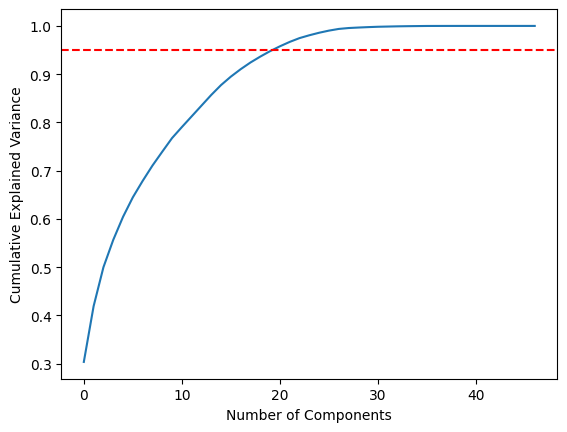

In [196]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold
plt.show()

Selecting components for 95% variance

In [197]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

pca_columns = [f'PC_{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

Combine it with original data

In [198]:
df = pd.concat([df.reset_index(drop=True), df_pca], axis=1)

Variance ratio of each principal component

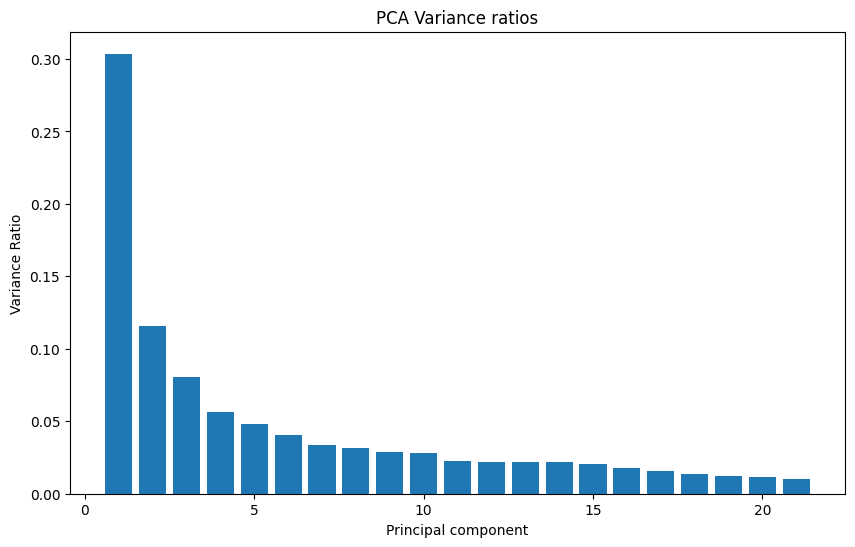

In [199]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Variance Ratio')
plt.title('PCA Variance ratios')
plt.show()


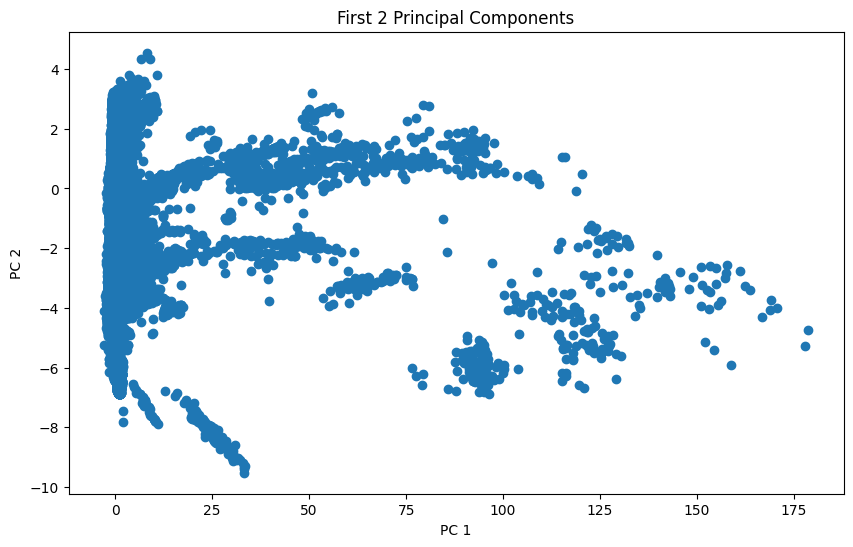

In [200]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC_1'], df_pca['PC_2'])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('First 2 Principal Components')
plt.show()